# Topic 13: Statistical Inference

With _Statistical Inference_, we infer predictions about the population based on measurements of the sample.  The underlying assumption is that there are some parameters of the population of which we do not have direct knowledge.  We can, however, compute parameter values from the sample.  How then can we relate the sample parameters to the population parameters?

There are two schools of thought about how to do this.  In fact, there is a bit of a war on the internet between these two approaches.  However, try to find a clear description of these approaches!  These approaches are the _frequentist_ and the _Bayesian_.

* Frequentist: The population has some parameters that are fixed, but are unaccessible to the observer.  But we can take samples from the population, then compute the parameters from the sample.  We can then use statistical inference techniques to make probable propositions regarding the population parameters.

* Bayesian: The data is fixed, the result of a sampling process.  But performing another sample will result in different, but fixed, data.  Parameters describing the data can be described probabilistically.  Bayesian inference methods produce parameter distributions.

The book summarizes these statements in this way:

* The assumptions in the Frequentist approach are related to the sampling process.

* The assumptions in the Bayesian approach are related to the statistical model.

To dig deeper into this is beyond the scope of this class!  The examples from the book are from the Frequentist approach, but the book recommends that the reader explores the Bayesian approach!

## Statistical Inference: The Frequentist Approach

The objective of Statistical Inference using the Frequentist approach is to produce probable propositions concerning population parameters from an analysis of a sample.  The following are the most important classes of propositions:

* Propositions about _point estimates_.  A point estimate is a value that approximates some parameter of interest, such as the mean or variance of the sample.

* Propositions about _confidence intervals_ or _set estimates_.  A confidence interval is a range of values that best represents some parameter of interest.

* Propositions about the acceptance or rejection of a _hypothesis_.

This process is based on the assumption that we can estimate the probability that the result has been caused by chance.

Traditional statistics was developed before the advent of electronic computers, so the tedious computations had to be performed by hand.  Consequently, these techniques were weveloped using theoretical approximations, idealized models and assumptions, and were focused on measuring the effects of chance on the statistic of interest.

With modern computers, alternative strategies became available, and more realistic models can be used.

## Preparing the Notebook

The following is the standard practice of loading the modules required for the Notebook.

In addition to the usual suspects, we also load the math package, so we can access the square root function.

The book also took this opportunity to initialize some of the plotting parameters.  But I didn't do this, as I didn't have Latex installed on my computer, and maybe you don't as well.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

## Estimates and Their Validity

Because we are not working on the whole population, we cannot get completely accurate values for the statistics.  And actually, even if we could sample the complete population, there may be variability in each entity's response, so collecting a second set of measures might not return exactly the same results.  So we know the results of descriptive statistics is not the _truth_, but is an approximation of the truth.  The assumption is that as we increase the size of the sample, the results approach the truth.

An important part of these statistics is to be able to measure the variability of the results:  How closely do we expect the results to approximate the value for the whole population.

## The Dataset

For this topic, we will be using a dataset of traffic accidents occurring in Barcelona in 2013 (and at one point we will also consider 2010 data).  Each event in the dataset represents key values concerning an accident, such as the day, time, address, number of dead and injured people, and so on.

This dataset has 9457 records, and will represent the complete population.  Since this is the complete population, we can compute the exact values for various metrics (we will consider this the _truth_).

However, for most of the work we will be doing, we will select a subset of this entire set, to be a sample under consideration.  We can then compute the metrics for this sample, then compare the results from the sample with the results from the population.  In fact, in many cases, we will select many samples, so we can see the distribution of the results obtained by these computations.

Most of our work will be considering the daily number of traffic accidents.  So after we collect and prepare the data, we will be summarizing the data as the number of accidents occurring each day.

The two data files we will be using are in the zip file for this lecture on Canvas.

Let's first load the 2013 data:

In [5]:
data = pd.read_csv('ACCIDENTS_GU_BCN_2013.csv')

We can take an initial peek at the data.  We can ask for the shape of the data, we can run .describe(), we can see the list of column names.  I like just printing the array itself, so we can see the first few and last few rows.  We can see some typical values and what format they have.

In [6]:
data

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Hora de dia,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X)
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,21,Tarda,Desconegut,0,1,0,1,2,-1,-1
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,21,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41"
2,2013S005373,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,10,Matí,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09"
3,2013S001486,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161407,Indústria,0224 0224,Dimarts,2,...,10,Matí,Altres,0,1,0,1,1,"4584836,20","431302,26"
4,2013S008254,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161101,Independència,0357 0357,Dilluns,1,...,16,Tarda,Desconegut,0,1,0,1,2,"4584704,26","431385,76"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9452,2013S008023,9,Sant Andreu,93-9-59,el Bon Pastor,701265,Litoral (Besòs),120000,Diumenge,7,...,18,Tarda,Desconegut,0,1,0,1,1,"4588266,09","433713,00"
9453,2013S006294,9,Sant Andreu,93-9-59,el Bon Pastor,701265,Litoral (Besòs),140000,Dijous,4,...,17,Tarda,Desconegut,0,2,0,2,3,"4588083,71","433798,37"
9454,2013S005884,9,Sant Andreu,93-9-59,el Bon Pastor,701266,Litoral (Llobregat),110000,Dimecres,3,...,10,Matí,Desconegut,0,9,0,9,2,"4588339,80","433640,52"
9455,2013S001311,9,Sant Andreu,93-9-59,el Bon Pastor,63850,Caracas,0050B0050B,Dimecres,3,...,17,Tarda,Desconegut,0,1,0,1,2,"4588592,95","433353,63"


This data is coming from Barcelona, so this is probably either Spanish or Catalan.  Interestingly, the majority of people in Barcelona speak both Spanish and Catalan, but these two languages are mutually unintelligible.  Luckily we are only going to be looking at the dates of the accidents.

But I don't see any columns that look like dates.  Just like many rows have been masked (using ...), we can also see that some columns have been dropped.  So let's look at the list of column names to see if any of these might be helpful.

In [7]:
data.columns

Index(['Número d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripció dia setmana', 'Dia de setmana', 'Descripció tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripció torn', 'Descripció causa vianant', 'Número de morts',
       'Número de lesionats lleus', 'Número de lesionats greus',
       'Número de víctimes', 'Número de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)'],
      dtype='object')

Looking through this list, we can see 'Mes de any', which might just be 'Month of year', 'Nom mes', which might be the name of the month, and 'Dia de mes', which might be the day of the month.  Let's look at some sample values from these columns:

In [8]:
data[['Mes de any', 'Nom mes', 'Dia de mes']]

,Mes de any,Nom mes,Dia de mes
0,10,Octubre,16
1,10,Octubre,29
2,7,Juliol,23
3,2,Febrer,26
4,11,Novembre,18
...,...,...,...
9452,11,Novembre,10
9453,9,Setembre,5
9454,8,Agost,14
9455,2,Febrer,20


This looks very promising.  The fact that the book tells us to use these columns is also a big clue!

We are going to be grouping the data by date, so somehow we need to make a column that has dates in it.

We can build a date by concatenating the month (the numeric version) with the day of the month, but then we also need to add in the year.  The year for this data is 2013.

This is easier said than done.  We might be tempted to do something like this:

  data['Date'] = '2013-' + data['Mes de any'] + '-' + data['Dia de mes']

You may ask what we are intending to do here!  data['Date'] indicates that we are trying to create a new column (Series) in the DataFrame.  On the right-hand side, we have a mixture of constant string values ('2013-' and '-') and Series values (data['Mes de any'] and data['Dia de mes']), and we are trying to concatenate these values.  The code is trying to combine Series and constants.  What this does is to examine each row at a time, performing the calculations on each row of data.  In essence, it turns this into a loop:

* for i in range(data.size()):
* _ _ data['Date'][i] = '2013-' + data['Mes de any'][i] + '-' + data['Dia de mes'][i]
    
That was pseudocode, but you can see how this assignment expands into a loop.

The data in these two columns are integer values, and python does not allow us to directly concatenate strings and integers.

I tried various operations without success, trying to convert those integers to strings.  So then I looked to see how the book did in:

In [9]:
data['Date'] = '2013-' + data[u'Mes de any'].apply(lambda x: str(x)) + '-' + data[u'Dia de mes'].apply(lambda x: str(x))
data.Date.head()

0    2013-10-16
1    2013-10-29
2     2013-7-23
3     2013-2-26
4    2013-11-18
Name: Date, dtype: object

So we wrote a lambda function which converts an integer to a string (using the str() function).  

Also note that for the names of the columns, the strings are prefixed with a 'u' character.  This indicates the string is unicode.  As we can see from some of the listings above, the data does have unicode characters, so to make sure the string comparisons work, we build the column names as unicode as well.

_Actually, these particular column names did not have any non-ASCII characters, so we didn't need to use the 'u' prefix.  I even tried, it does work to remove the u.  But it is good practice to put the u's in.  If we later change which columns we are looking at, we might forget to put the u back in._

One last thing...the type of data in this column is _object_.  We have what looks like legal dateTime values, but they are just strings.  Luckily Pandas has a function that can convert a Series of strings into a Series of dateTime values.  We use the following code to replace the string version of the column with a dateTime version:

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data.Date.head()

0   2013-10-16
1   2013-10-29
2   2013-07-23
3   2013-02-26
4   2013-11-18
Name: Date, dtype: datetime64[ns]

Now we are getting really close!  We have a column that holds the dates, so we can group by that.  When we do the groupby, we then want to reduce the data (combine all of the rows in the group to a single row containing a summary metric).  Since we just want the number of accidents each day, we can simply ask for the size of the group.  We will store the results of the grouping/reduction in a new Series, _accidents_.  We will still have our original dataset, but now we have a new Series containing just the data we want to work with.

In [11]:
accidents = data.groupby(['Date']).size()
accidents

Date
2013-01-01    16
2013-01-02    18
2013-01-03    17
2013-01-04    29
2013-01-05    17
              ..
2013-12-27    21
2013-12-28    12
2013-12-29    13
2013-12-30    26
2013-12-31    19
Length: 365, dtype: int64

As we would expect, there are 365 rows in the set, as there is one row for each day in the year.  And we also see that each row only contains a single cell holding an integer, the number of accidents on that day.  We can print out the mean:

In [12]:
print(accidents.mean())

25.90958904109589


We are just about to get started with our analysis...but the data is in a Series.  That is somewhat great, but DataFrames are more useful.  Luckily Pandas has a function that creates a DataFrame from a Series.  (The original Series is still intact, but we now have a DataFrame version).

While we are at it, we can give a name to the column, rather that leave the name as the default '1'.

In [13]:
df = accidents.to_frame()
df.columns = ['Count']
df

,Count
Date,
2013-01-01,16
2013-01-02,18
2013-01-03,17
2013-01-04,29
2013-01-05,17
...,...
2013-12-27,21
2013-12-28,12
2013-12-29,13


Perhaps we should plot the data, to give us an idea of what we are looking at.  Perhaps some things will pop out of the graph.  Here is a simple graph of the data:

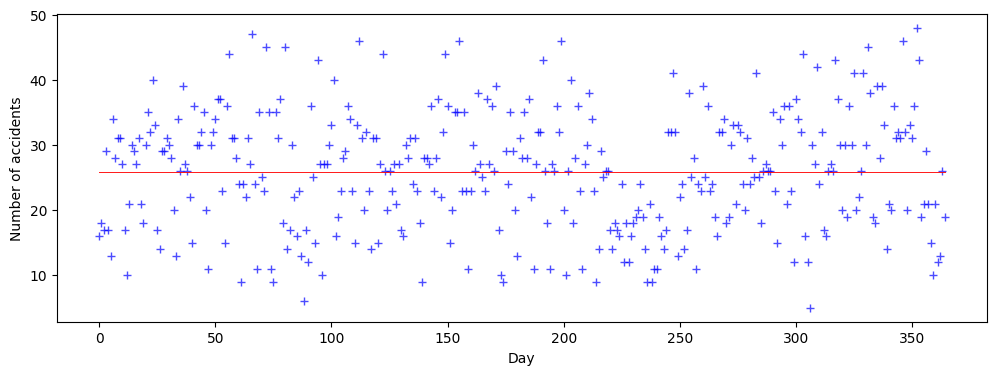

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.ylabel('Number of accidents')
plt.xlabel('Day')
plt.plot(np.array(accidents), 'b+', lw=0.7, alpha=0.7)
plt.plot([accidents.mean()]*365, 'r', lw=0.7, alpha=0.9)
plt.show()

We can see that the data is pretty evenly spread out, between about 10 and 50 accidents per day.

Before we move on, let's look at the code for generating this plot:

* The book usually started all graphs with this line.  As I understand, the 'fig' and 'ax' are two portions of the plot, the actual figure and the part that draws the axes.  By setting the figsize, this sets the size of the image on the page.  Adjust these values to get the image to appear the size you want in the Notebook.

* plt.ylabel, plt.xlabel, plt.title set the labels for the axes and for the diagram as a whole.  For this chart, they didn't include a title.

* Next are two plots.  The first plots the data points, the second draws the mean of the values (the red line in the diagram).

* For each plot, we give an array of values.  In the first plot, these are the actual data points.  In the second plot, we take the data's mean, then replicate that 365 times to make an array of the same size, but will identical values in all spots.

* The next string indicates how to draw the data.  The first character, 'b' or 'r', set the color of the lines (blue or red).  For the first plot, the '+' character indicates what to draw for each point on the plot (in this case plus symbols).

* The 'lw' parameter sets the line width.  There is no actual line for the first plot, but for the second plot, there is a line.

* Finally, the 'alpha' value sets the transparency of the color.

What follow is a different version of the plot.  In this case, the format string is 'b-+'. The 'b' sets the color to blue, the '-' indicates that a line should be drawn between each of the points, and the '+' indicates what should be drawn at each point.

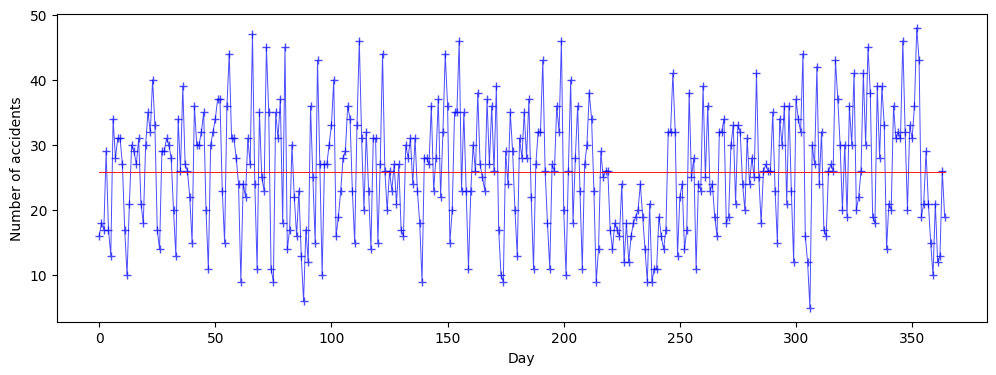

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.ylabel('Number of accidents')
plt.xlabel('Day')
plt.plot(np.array(accidents), 'b-+', lw=0.7, alpha=0.7)
plt.plot([accidents.mean()]*365, 'r', lw=0.7, alpha=0.9)
plt.show()

Excellent, we are now ready to get started.

## Samples

As we stated earlier, we typically work with _samples_ rather than with the whole _population_.  Our population is the _df_ DataFrame, these 365 rows of data.  We can select some of the elements from this DataFrame to make a new DataFrame with fewer values.

Once we have done that, we can compute some metric for the sample, then we can compare that to the same metric computed for the whole population.

For example, one really simple and useful metric is the mean.  And we have already computed the mean for the population, it was about 25.9.  So let's build a sample, then compute it's mean.

A DataFrame has a method for selecting a random sample.  The name of the method is 'sample', and one of the parameters we can pass to this method is 'n', the number of elements to select for our sample.

Clearly we can't select _all_ of the values (and we can't select _more_ than the number of values in the population).  On the other hand, we also don't want to select too few, because then maybe our subset is not really representative.

We will experiment with the size in a bit, but for now, let's use a sample size of 200:

In [16]:
sampled1 = df.sample(n = 200)
sampled1

,Count
Date,
2013-05-02,27
2013-01-10,31
2013-03-24,17
2013-04-09,27
2013-03-30,6
...,...
2013-05-28,22
2013-02-16,20
2013-05-30,44


This looks like a reasonable sample, and the rows even appear to be in a random order.  We can compute the mean:

In [17]:
df.mean()

Count    25.909589
dtype: float64

In [18]:
sampled1.mean()

Count    25.45
dtype: float64

OK, so the mean for our sample is not the same as the mean for the whole population.  It is pretty close, but not exact.  And we wouldn't expect an exact match.  Let's try a couple more examples.  We will make some new samples and check their means:

In [19]:
sampled2 = df.sample(n = 200)
sampled2.mean()

Count    25.47
dtype: float64

In [20]:
sampled3 = df.sample(n = 200)
sampled3.mean()

Count    25.575
dtype: float64

So the means for each of the samples are different, but they are all fairly close to the population mean.  If we rerun this Notebook, we will get different answers!  And if you run this at home, you will get different answers as well, because the samples are randomly generated.

How does this help us?  Yes, we are looking at samples, but how can we determine the population mean when the sample means vary?

We only have a few datapoints here.  What if we run a _lot_ of samples, then look at the distribution of the means that we get?

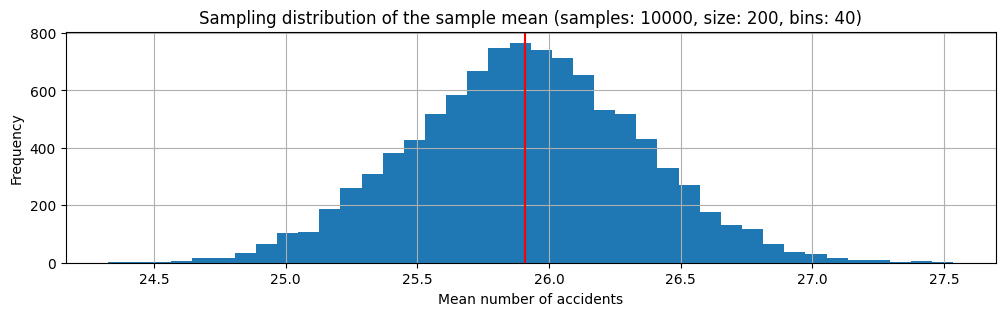

In [21]:
def trySamples(num_test, num_elements, num_bins):
    means = []
    for i in range(num_test):
        rows = df.sample(n = num_elements)
        means.append(rows.mean()[0])
    s = pd.Series(means)
    fig, ax = plt.subplots(1, 1, figsize=(12, 3))
    s.hist(histtype = 'stepfilled', bins = num_bins)
    ax.axvline(x=accidents.mean(), ymin=0, ymax=40, color=[1, 0, 0])
    plt.ylabel('Frequency')
    plt.xlabel('Mean number of accidents')
    plt.title(f'Sampling distribution of the sample mean (samples: {num_test}, size: {num_elements}, bins: {num_bins})')
    
trySamples(10000, 200, 40)

In [22]:
sampled1.sort_values(by = 'Count', ascending = True, inplace = False)

,Count
Date,
2013-11-03,5
2013-03-30,6
2013-08-27,9
2013-06-24,9
2013-08-25,9
...,...
2013-05-30,44
2013-02-26,44
2013-11-28,45


We can see that the sample mean follows a normal distribution around the population's mean.

We have three parameters to this function: The number of samples run, the number of elements in each sample, and the number of bins in the histogram.  How did we choose these values?  Let's try varying these values to see what happens.

First, let's try lowering the number of samples run:

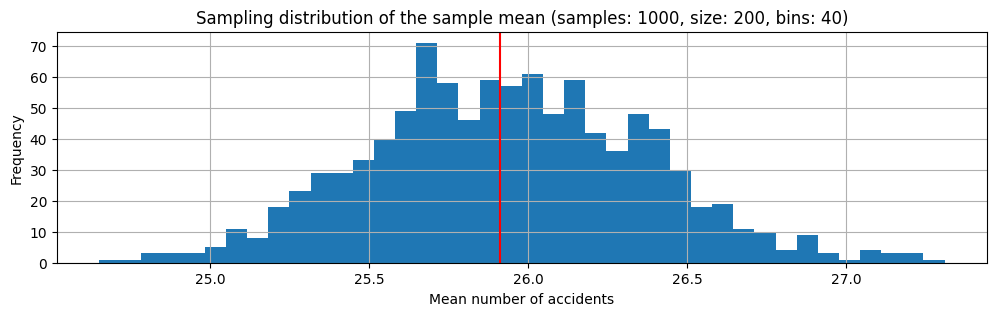

In [23]:
trySamples(1000, 200, 40)

While we can vaguely see the shape of a normal distribution, its not too clear.  There is a tradeoff: with fewer trials, the shape of the curve gets very chunky, but with more trials, it takes longer to generate the results.

Now let's try fewer elements in each sample:

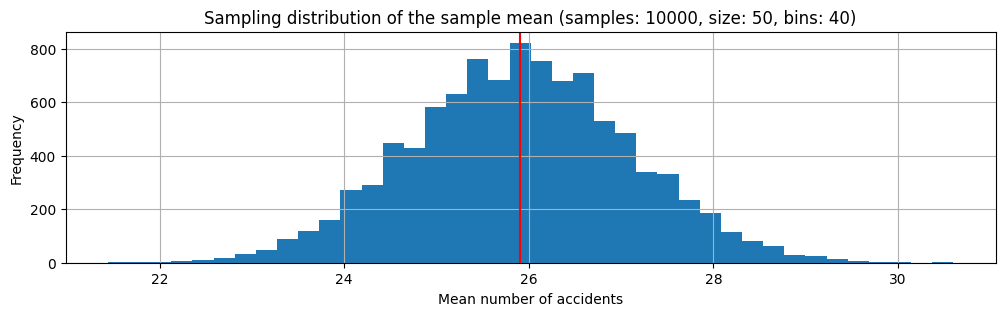

In [24]:
trySamples(10000, 50, 40)

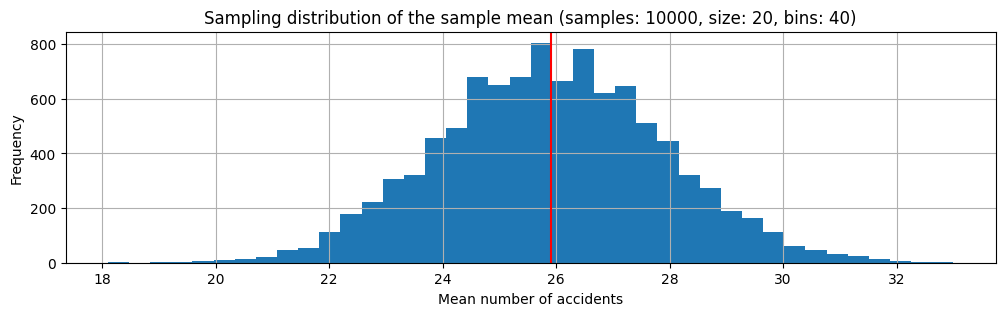

In [25]:
trySamples(10000, 20, 40)

While the general shape of the distribution stays about the same, the variance increases greatly!

* With 200 elements, the lower tail of the curve was close to 25.

* With 50 elements, the lower tail was about 23.

* With 20 elements, the lower tail was about 21.

We can't really try _more_ elements, since the complete population is only 365!

I am rather curious:  What if the size of the population was one million?  Would 200 elements still be a reasonable sample size, or would we need to have a substantially larger sample size?

The next thing to vary is the number of bins:

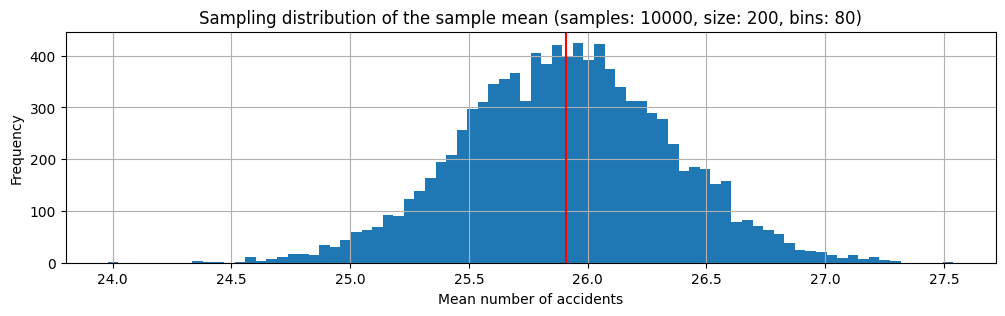

In [26]:
trySamples(10000, 200, 80)

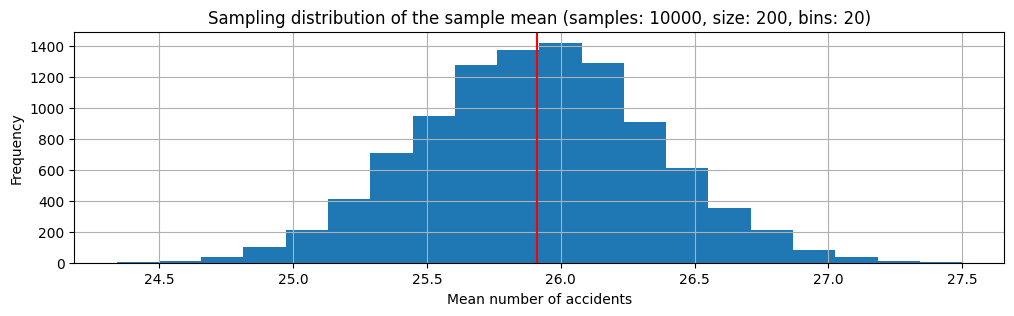

In [27]:
trySamples(10000, 200, 20)

If we have too many bins, we see a lot more granularity.  If we have too few bins, then we lose a lot of detail.

When performing an analysis, some times we need to explore a bit to find the parameters that give us the most information.  Care must be taken not to search for a view that best fits our preconceived ideas or that best matches our desired outcome.  We want to find the view that best describes the data.

## Empirical Standard Error

One interesting metric is, "What is the standard deviation of the sample mean?"  We have seen that the sample means vary from the population mean, but by how much do these samples vary?  If the standard deviation is small, then our sample mean is probably fairly close to the population mean.  But if the standard deviation is large, then we are less sure about our estimate reflecting the population's value.

It can be mathematically shown that given _n_ independent observations (in other words, if we have a sample of _n_ elements) of a population with a standard deviation $ \sigma_x $, the standard error $ \sigma_{\bar x} $ can be approximated by:

$$ S E = \frac{\sigma_x}{\sqrt n} $$

This result is based on the Central Limit Theorem, an old theorem introduced in 1810 by Laplace.

This formula uses the standard deviation of the population $ \sigma_x $, which is not known, but it can be shown thatif it is substituted by its empirical estimate $ \hat \sigma_x $, the estimation is sufficiently good if $ n > 30 $ and the population distribution is not skewed.

So how do we measure the variability of the sample mean?  By giving the _empirical standard error of the mean distribution_.

In [28]:
def standardError(num_test, num_elements):
    rows = df.sample(n = num_elements)
    est_sigma_mean = rows.std() / math.sqrt(num_elements)
    means = []
    for i in range(num_test):
        srows = df.sample(n = num_elements)
        means.append(srows.mean())
    sim_mean = pd.Series(means).std()
    print(f'Direct estimation of SE from one sample of {num_elements} elements: {est_sigma_mean[0]}')
    print(f'Estimation of the SE by simulating {num_test} samples of {num_elements}: {sim_mean}')

standardError(10000, 200)

Direct estimation of SE from one sample of 200 elements: 0.6761667749436439
Estimation of the SE by simulating 10000 samples of 200: 0.43115285340271114


## Bootstrapping

In our previous examples, we considered the dataset to be the whole population, then we picked a sample from this set to compute the mean.  However, we could not determine the distribution of the mean since we only had one value.

To fix this problem, we created many samples from the dataset, computed each of the means, then we could examine the distribution of these means.  From that, we determined the variance of the means.

What if the was not the whole population, but rather a sample of the whole population.  If this is the case, then we only have the one sample, and we cannot construct any other samples of the population.  So how do we determine the variance?

One technique is called _bootstrapping_.  We make a series of samples _of our original sample_.  We can then approximate the variance of the original sample (our dataset), and thereby we have an approximation of the variance for the whole population!

To summarize:

* There is the population, which we don't have access to.

* We do have one sample from the population, which is our dataset.

* We make a smaller sample from the dataset, and compute the mean of that.

* We repeat that last step many times, and can then compute the variance of the dataset.

* The variance of the dataset is a good approximation of the variance we would find for the whole population, if we were to gain access to the population.

In [29]:
def meanBootstrap(data, iterations):
    means = []
    for i in range(iterations):
        sample = [data[j] for j in np.random.randint(len(data), size=len(data))]
        means.append(np.mean(sample))
    return pd.Series(means)

m = meanBootstrap(accidents, 10000)
print("Mean estimate: ", m.mean())
    

Mean estimate:  25.912300821917807


<Axes: >

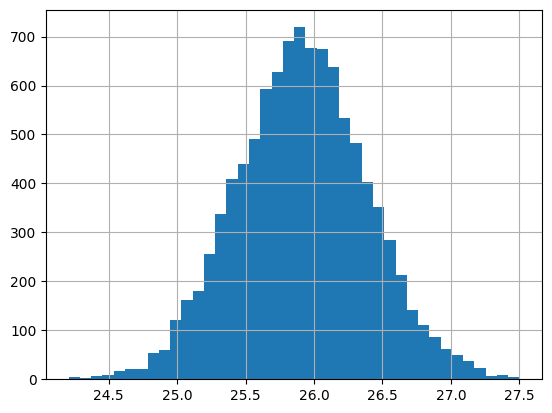

In [30]:
m.hist(histtype='stepfilled', bins = 40)

## Confidence Interval

A point estimate $ \Theta $, such as the sample mean, provides a _plausible value_ for a parameter.  This does not perfectly match the actual value, but should be reasonably close.

We would like to model how much this estimation might vary from the actual value.  Computing the standard error is one way to express this variability.

Another approach would be to provide a _plausible range of values_ for the parameter.  In other words, we might say that we expect the actual value to be somewhere in the range $ \alpha < x < \beta $.  This plausible range is called a _confidence interval_.

However, there can be many _confidence intervals_, each with a different _degree of confidence_.  For example, we might say:

* We are 90% certain that the actual value is in the interval from 25.1 to 26.7.

* We are 95% certain that the actual value is in the interval from 24.98 to 26.84.

* We are 99% certain that the actual value is in the interval from 24.68 to 27.14.

We construct a confidence interval as follows:

* The point estimate ($ \Theta $) is the most plausible value for the parameter.  We use this as the center of the confidence interval.

* The spread of the confidence interval should be related to the sampling distribution of the estimate.

* For example, using a spread of 1.96 _SE_ from $ \Theta $, we are saying that we are 95% certain that the true parameter value is in this range.  Reflecting this, we are also saying that there is a 95% chance that $ \Theta $ is within this distance from the true value!

For the case of the mean, the Central Limit Theorem states that its sampling distribution is normal:

__Theorem__ _Given a population with a finite mean $ \mu $ and a finite non-zero variance $ \sigma^2 $, the sampling distribution of the mean approaches a normal distribution with a mean of $ \mu $ and a variance of $ \frac{\sigma^2}{n} $ as n, the sample size, increases._

We make use of a well-known result from probability that appies to normal distributions: roughly 95% of the time our estimate will be within 1.96 standard errors of the true mean.  Given an interval that spreads out 1.96 standard errors, we can say that we are _roughly 95% confident that the range captures the true parameter.

In [31]:
def confidenceInterval(data, level):
    match level:
        case 90:
            factor = 1.65
        case 95:
            factor = 1.96
        case 99:
            factor = 2.58
        case 99.9:
            factor = 3.291
        case _:
            factor = 1.96
    m = data.mean()
    se = data.std() / math.sqrt(len(data))
    return [m - se * factor, m + se * factor]

print(f'Confidence interval: {confidenceInterval(accidents, 95)}')

Confidence interval: [24.975156065800284, 26.8440220163915]


In [32]:
print(m.mean())

25.912300821917807


A spread of 1.96 _SE_ gives us 95% confidence.  You can see in the above code several other spreads and their associated confidence levels.

We can use bootstrapping to compute a confidence interval of the sample mean as follows:

* For a large number of times, _s_, select a bootstrap sample from the dataset then compute the mean of this bootstrap sample.

* Compute the mean of the _s_ means to get the bootstrapped estimate of the sample mean.

* Calculate the standard deviation of that set of _s_ values, giving the bootstrapped estimate of the standard error (_SE_).

* Obtain the 2.5th and 97.5th percentiles of the _s_ values.

In [33]:
m = meanBootstrap(accidents, 10000)
sample_mean = m.mean()
sample_se = m.std()
print(f'Mean estimate: {sample_mean:.4f}')
print(f'SE of the estimate: {sample_se:.4f}')
ci = [np.percentile(m, 2.5), np.percentile(m, 97.5)]
print(f'Confidence interval: {ci}')

Mean estimate: 25.9104
SE of the estimate: 0.4736
Confidence interval: [24.986301369863014, 26.85753424657534]


## But What Does "95% Confident" Mean?

Suppose we took many samples from a population and built a 95% confidence interval from each of the samples.  Then about 95% of those intervals would contain the actual parameter.

The following cell shows this procedure for 100 samples (we could use more samples, but the plot would lose detail).

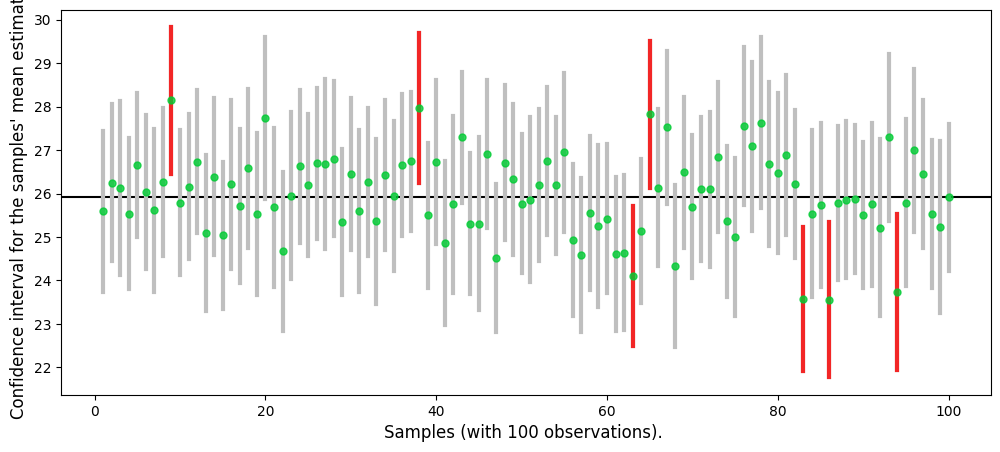

In [34]:
df = accidents   

n = 100                                               # number of observations
N_test = 100                                          # number of samples with n observations
means = np.array([0.0] * N_test)                      # samples' mean
s = np.array([0.0] * N_test)                          # samples' std
ci = np.array([[0.0,0.0]] * N_test)
tm = df.mean()                                        # "true" mean

for i in range(N_test):                               # sample generation and CI computation
    rows = np.random.choice(df.index.values, n)
    sampled_df = df.loc[rows]
    means[i] = sampled_df.mean()
    s[i] = sampled_df.std()
    ci[i] = means[i] + np.array([-s[i] *1.96/np.sqrt(n), s[i]*1.96/np.sqrt(n)])    

out1 = ci[:,0] > tm                                   # CI that do not contain the "true" mean
out2 = ci[:,1] < tm

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ind = np.arange(1, N_test+1)
ax.axhline(y = tm, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])
ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
plt.show()

We cannot say, for any particular sample, that the 95% confidence interval has a 95% chance of containing the true value.  It may be that the particular sample is really skewed.

But what we can say is _in 95% of the cases when we pick a sample, then generate the 95% confidence interval from this sample, then the true value is within that interval 95% of the time!_

So 95% of the time we capture the true value 95% of the time!

## Hypothesis Testing

One statistical proposition about a population is to give a measure of the variability of an estimate.

Another type of proposition would be _hypothesis testing_, based on the concept of _statistical significance_.

Suppose we had done a deeper analysis of traffic accidents in Barcelona and discovered a different value, perhaps a different mean number of accidents, for the years 2010 and 2013.

* One possibility is that the difference is just because of chance.  There is variability is both of the estimates, so maybe the underlying parameter has not changed, but just that the two particular samples happened to be different.  This is similar to the differences we discovered when we were using samples of our one dataset.  In essence, the two years are two different samples of the same population.

* Another possibility is that there was actually a change to the underlying parameter.  In essence, the two different years really were two separate scenarios, and consequently our estimate changed.  How might the parameter have changed?  Any number of reasons.  More people moved to the city.  The road conditions were deteriorating.  Due to social unrest, people are driving more aggressively.  Perhaps the new cell phone fad took over and more people are texting and driving.  What ever the reason, because the underlying parameter really changed, we can consider the two years as being separate populations.

The relevant question is: _Are the observed effects real or not?_

Or, more formally: _Were the observed effects statistically significant?_

The process of determining the statistical significance of an effect is called _hypothesis testing_.  This process starts by simplifying the options into two competing hypotheses:

* $ H_0 $: The mean number of daily traffic accidents is the same in 2010 and 2013, there is only one population, one true mean, and 2010 and 2013 are just different samples from the same population.

* $ H_A $: The mean number of daily traffic accidents in 2010 and 2013 is different, these are two samples from two different populations.

We call $ H_0 $ the _null hypothesis_ and it represents the _skeptical_ point of view: The effect we have observed is due to chance.  $ H_A $ is the _alternative hypothesis_ and it represents the point of view that the effect is real.

The general rule of frequentist hypothesis testing is that we will not _discard_ $ H_0 $, and hence we will not consider $ H_A $, unless the observed effect is _implausible_ under $ H_0 $.

## Testing Hypothesis Using Confidence Intervals

We can use _confidence intervals_ to measure the _plausibility_ of a hypothesis.

In [35]:
data = pd.read_csv("ACCIDENTS_GU_BCN_2010.csv", encoding='latin-1')
#Create a new column which is the date
data['Date'] = data['Dia de mes'].apply(lambda x : str(x)) + '-' +  \
               data['Mes de any'].apply(lambda x : str(x))
data2 = data['Date']
counts2010 =data['Date'].value_counts()
print(f'2010: Mean {counts2010.mean():.4f}')

data = pd.read_csv("ACCIDENTS_GU_BCN_2013.csv", encoding='latin-1')
#Create a new column which is the date
data['Date'] = data['Dia de mes'].apply(lambda x : str(x)) + '-' +  \
               data['Mes de any'].apply(lambda x : str(x))
data2 = data['Date']
counts2013 = data['Date'].value_counts()
print(f'2013: Mean {counts2013.mean():.4f}')

2010: Mean 24.8110
2013: Mean 25.9096


This preliminary test suggests that in 2013 the mean rate of traffic accidents was higher than in 2010.  But is this effect statistically significant?

Earlier we had built a 95% confidence interval for the 2013 data:

In [36]:
print(f'Confidence interval: {confidenceInterval(accidents, 95)}')

Confidence interval: [24.975156065800284, 26.8440220163915]


We can see that the 2010 accident rate estimate does not fall in the range of plausible values for 2013.  We can therefore say that the alternative hypothesis cannot be discarded.

## Interpreting CI Tests

Hypothesis testing is built around rejecting or failing to reject the null hypothesis.  We do not reject $ H_0 $ unless there is strong evidence against it.  But what does strong evidence mean?

As a general rule of thumb, for those cases where the null hypothesis is actually true, we do not want to incorrectly reject $ H_0 $ more than 5% of the time.  this corresponds to a _significance level_ of $ \alpha = 0.05 $. In this case, the correct interpretation of our test is as follows.

If the value lies outside of the 95% confidence interval, then we would make an error to reject the null hypothesis only 5% of the time.

## Testing Hypotheses Using _p_-Values

This approach is a more advanced notion of _statistical significance_.  We calculate _P_, the probability that the observed measurement would occur if the _null hypothesis_ was true.  This probability is called the _p-value_.

Usually, if _P_ is less than 0.05 (the chance of a fluke is less than 5%), the result is declared _statistically significant_.

Another way to say this is, "_Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?_".

Here is how we answer this question:

* The first step is to quantify the size of the apparent effect by choosing a test statistic.  In our case, the apparent effect is a difference in accident rates, so the test statistic would be __difference in means between the two periods__.

* The second step is to define a _null hypothesis_, which is a model of the system based on the assumption that the apparent effect is not real.  In our case, the null hypothesis is that there is no difference between the two periods.

* The third step is to compute a _p-value_, which is the probability of seeing the apparent effect if the null hypothesis is true.  In our case, we would compute the difference in means, then compute the probability of seeing a difference as big, or bigger uner the null hypothesis.

* The last step is to _interpret the result_.  If the _p_value_ is low, the effect is said to be _statistically significant_, which means that it is unlikely to have occurred by chance.

Let's test this out for our case:

In [37]:
n10 = len(counts2010)
n13 = len(counts2013)
m10 = counts2010.mean()
m13 = counts2013.mean()
p = m13 - m10
print(f'size of 2010: {n10}, size of 2013: {n13}')
print(f'mean of 2010: {m10:.4f}, mean of 2013: {m13:.4f}')
print(f'mean difference: {p:.4f}')

size of 2010: 365, size of 2013: 365
mean of 2010: 24.8110, mean of 2013: 25.9096
mean difference: 1.0986


To approximate the _p-value_, we can do the following:

* Pool the two input sets, each of size _n_, to form one mixed set, of size _2n_.  We pool the two sets, because under the _null hypothesis_, both sets are samples from the same population, so mixing them simply gives us one sample, of twice the size, that should be 'just as valid' as the two original samples.

* Generate a large number of pairs of samples $ \alpha $ and $ \beta $ from this mixed set, the size of each sample to be _n_.  We then compute the difference of the means of these two sets.  Note that if the _null hypothesis_ is true, then each iteration should be equivalent to our two original samples (one from 2010 and one from 2013).  In both cases, we had a population from which we extracted two samples, then took the means and computed the differences.

* We then count how many of these iterations had values that were larger than the original difference we computed.  If the _null hypothesis_ were true, then our original difference should be 'just like any of the other differences'.  However, if there are very few iterations that had a larger difference, we then conclude that it is unlikely that the two original sets were samples from the same population, they most likely actually came from different populations.

Let's try:

In [38]:
# Pooling distributions
pool = np.concatenate([counts2010, counts2013])
np.random.shuffle(pool)

# Sample generation
# n13 is the size of the 2013 data, from earlier cell
N = 10000 # Number of samples
diff = [0] * N
for i in range(N):
    p1 = [random.choice(pool) for _ in range(n13)]
    p2 = [random.choice(pool) for _ in range(n13)]
    diff[i] = np.mean(p1) - np.mean(p2)

# Counting differences larger than the observed one
# p is the mean of the comparison between 2013 and 2010, from earlier cell
diff2 = pd.DataFrame(diff, columns=['data'])
diff3 = diff2[diff2.data > p]
p_val = diff3.size/float(diff2.size)
print(f'p-value (simulation) = {p_val}')
print(f'. (as a percent: {100*p_val}%)')
print(f'Difference = {p}')
if (p_val < 0.05):
    print('The effect is likely')
else:
    print('The effect is not likely')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Interpreting P-Values

A _p_-value is the probability of an an observed (or more extreme) result arising only from chance.

If _P_ is less than 0.05, there are two possible conclusions:

* There is a real effect, or

* The result is an improbable fluke.

Let is define a little notation:

* _P_: "The probability of"

* _E_: "An Effect", or observation

* _H_: "An Hypothesis"

So _P(E|H)_ means "the probability of seeing the effect _E_ if the hypothesis _H_ is true".

Conversely, _P(H|E)_ means "the probability of hypothesis _H_ being true if we observe effect _E_".

These are two different things!  The _p_-value is _P(E|H)_.  So if the _p_-value is less than 0.05, this means that there is only a 5% chance of observing _E_ if the _null hypothesis H_ is true.  The incorrect interpretation is that there is only a 5% chance of the hypothesis _H_ being true if we observe effect _E_.



## But is the Effect _E_ Real?

We have not yet answered this question!

We have defined a null hypothesis $ H_0 $ (the effect is not real), and we have computed the probability of observing the effect under the null hypothesis, which is $ P ( E | H_0 ) $.

We have stated that from a frequentist point of view, we cannot consider $ H_A $ unless $ P ( E | H_0 ) $ is less than a particular arbitrary value.

But the real answer to this question must be based on comparing $ P ( H_0 | E ) $ to $ P ( H_A | E ) $.

No matter how much data you have, you will still depend on intuition to decide how to interpret, explain, and use that data.